### Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_Learning-USU/blob/main/Lectures%20and%20codes/DL%20Spring%202023/Module%203-%20Machine%20Learning%20Review/Module%203-%20ML%20PyCaret-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Module3- ML with PyCaret

## Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [1]:
#only if you want to run it in Google Colab: 

!pip install --pre pycaret[full] 

In [1]:
# let's double ckeck the Pycaret version: 
from pycaret.utils import version
version()

'3.0.0.rc4'

## Importing Dataset

In [53]:
from pycaret.datasets import get_data
# try get_data('index') to see the list of all available data. 

In [3]:
dataset = get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [4]:
# for the sake of time, let's work wity a tiny subsample of data
dataset = dataset.sample(5000)

In [5]:
data = dataset.sample(frac=0.9, random_state=123)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4500, 10)
Unseen Data For Predictions: (500, 10)


In [6]:
data.shape

(4500, 10)

In [7]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.21,0.60,5,151,6,0,0,RandD,medium,0
1,0.50,0.50,3,237,2,0,0,technical,medium,0
2,0.57,1.00,4,227,10,0,0,technical,low,0
3,0.38,0.55,2,158,3,0,0,support,low,1
4,0.54,0.74,3,185,4,0,0,sales,low,0


In [8]:
data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     214
time_spend_company         8
Work_accident              2
promotion_last_5years      2
department                10
salary                     3
left                       2
dtype: int64

In [9]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary', 'left'],
      dtype='object')

## Setting up Environment in PyCaret

**setup()**:

This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes two mandatory parameters: data and target. All the other parameters are optional.

In [11]:
from pycaret.classification import *

The latest version of PyCaret is Object oriented API. This means that the settings are linked with an object, you can run as many experiments as you want in the same notebook and compare them seamlessly not just across different modeling options but also different preprocessing settings.


In [12]:
exp = ClassificationExperiment() 
exp.setup(data,  target='left', session_id=555, train_size=0.7, preprocess=True)



,Description,Value
0,Session id,555
1,Target,left
2,Target type,Binary
3,Original data shape,"(4500, 10)"
4,Transformed data shape,"(4500, 12)"
5,Transformed train set shape,"(3149, 12)"
6,Transformed test set shape,"(1351, 12)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [54]:
# list of available models in PyCaret for classification.
exp.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## Compare Models

This function trains and evaluates performance of all estimators available in the model library using cross validation. The output of this function is a score grid with average cross validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [57]:
# Adding the list of models we want to include in our study: 
model_list = ['lr', 'dt', 'rf', 'xgboost', 'catboost', 'lightgbm']

In [70]:
my_models = exp.compare_models(include=model_list, n_select=6)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9603,0.9811,0.8538,0.9794,0.9107,0.8855,0.8901,0.0720
dt,Decision Tree Classifier,0.9270,0.9038,0.8591,0.8647,0.8546,0.8065,0.8126,0.2340
catboost,CatBoost Classifier,0.8924,0.9563,0.7130,0.8818,0.7701,0.7028,0.7218,1.4490
xgboost,Extreme Gradient Boosting,0.8222,0.9359,0.4336,0.8201,0.5313,0.4398,0.4886,0.0640
lr,Logistic Regression,0.7939,0.8176,0.3689,0.6228,0.4621,0.3452,0.3638,0.6100
lightgbm,Light Gradient Boosting Machine,0.7396,0.9305,0.1172,0.3466,0.1446,0.0660,0.0875,0.0550


## Tune model

This function tunes the hyperparameters of a given estimator. The output of this function is a score grid with CV scores by fold of the best selected model based on optimize parameter. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [61]:
data.left.value_counts()
# data is relatively balanced, we can optimize based on accuracy. 

0    3416
1    1084
Name: left, dtype: int64

In [83]:
my_models

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=555, verbose=0, warm_start=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        random_state=555, splitter='best'),
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_byt

In [78]:
tuned_models = [exp.tune_model(model, optimize='Accuracy') for model in my_models]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9524,0.9759,0.8158,0.9841,0.8921,0.8619,0.8681
1,0.9587,0.9702,0.8553,0.9701,0.9091,0.8825,0.8855
2,0.9714,0.9904,0.8947,0.9855,0.9379,0.9194,0.9212
3,0.9746,0.9773,0.9342,0.9595,0.9467,0.9300,0.9301
4,0.9460,0.9791,0.8553,0.9155,0.8844,0.8492,0.8500
5,0.9556,0.9776,0.9079,0.9079,0.9079,0.8786,0.8786
6,0.9619,0.9752,0.8553,0.9848,0.9155,0.8911,0.8948
7,0.9810,0.9921,0.9474,0.9730,0.9600,0.9475,0.9476
8,0.9619,0.9857,0.9211,0.9211,0.9211,0.8959,0.8959


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9429,0.9111,0.7895,0.9677,0.8696,0.8335,0.8405
1,0.9524,0.9338,0.8421,0.9552,0.8951,0.8645,0.8673
2,0.9714,0.9661,0.9211,0.9589,0.9396,0.9209,0.9212
3,0.9587,0.9568,0.8947,0.9315,0.9128,0.8857,0.8860
4,0.9651,0.9836,0.9342,0.9221,0.9281,0.9050,0.9051
5,0.8762,0.9093,0.9474,0.6729,0.7869,0.7031,0.7236
6,0.9556,0.9199,0.8553,0.9559,0.9028,0.8741,0.8764
7,0.9778,0.9851,0.9605,0.9481,0.9542,0.9396,0.9396
8,0.9619,0.9511,0.9211,0.9211,0.9211,0.8959,0.8959


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9524,0.9688,0.8158,0.9841,0.8921,0.8619,0.8681
1,0.9619,0.9594,0.8553,0.9848,0.9155,0.8911,0.8948
2,0.9714,0.9909,0.8947,0.9855,0.9379,0.9194,0.9212
3,0.9651,0.9762,0.9079,0.9452,0.9262,0.9033,0.9036
4,0.9683,0.9912,0.9605,0.9125,0.9359,0.9148,0.9154
5,0.9651,0.9772,0.9211,0.9333,0.9272,0.9042,0.9042
6,0.9619,0.9562,0.8553,0.9848,0.9155,0.8911,0.8948
7,0.9746,0.9893,0.9342,0.9595,0.9467,0.9300,0.9301
8,0.9651,0.9845,0.9342,0.9221,0.9281,0.9050,0.9051


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9619,0.9677,0.8421,1.0000,0.9143,0.8900,0.8955
1,0.9556,0.9718,0.8553,0.9559,0.9028,0.8741,0.8764
2,0.9714,0.9890,0.9079,0.9718,0.9388,0.9202,0.9211
3,0.8349,0.9373,0.8158,0.6200,0.7045,0.5929,0.6037
4,0.9238,0.9794,0.7500,0.9194,0.8261,0.7779,0.7846
5,0.8825,0.9518,0.9211,0.6931,0.7910,0.7115,0.7254
6,0.9587,0.9762,0.8684,0.9565,0.9103,0.8836,0.8854
7,0.9302,0.9871,0.7368,0.9655,0.8358,0.7925,0.8042
8,0.9556,0.9841,0.9211,0.8974,0.9091,0.8797,0.8798


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7968,0.8106,0.3421,0.6500,0.4483,0.3381,0.3643
1,0.8000,0.8042,0.3947,0.6383,0.4878,0.3720,0.3886
2,0.8063,0.8105,0.3816,0.6744,0.4874,0.3791,0.4025
3,0.8063,0.8265,0.3947,0.6667,0.4959,0.3856,0.4059
4,0.7841,0.8057,0.3158,0.6000,0.4138,0.2968,0.3198
5,0.7492,0.7806,0.3158,0.4706,0.3780,0.2284,0.2356
6,0.7619,0.7604,0.3289,0.5102,0.4000,0.2600,0.2698
7,0.8127,0.8600,0.4737,0.6545,0.5496,0.4352,0.4443
8,0.8190,0.8677,0.4737,0.6792,0.5581,0.4489,0.4604


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8603,0.9481,0.4211,1.0000,0.5926,0.5246,0.5963
1,0.8921,0.9534,0.5658,0.9773,0.7167,0.6558,0.6931
2,0.8381,0.9540,0.4342,0.8049,0.5641,0.4754,0.5096
3,0.7016,0.8332,0.6711,0.4250,0.5204,0.3193,0.3369
4,0.8127,0.9618,0.2368,0.9474,0.3789,0.3126,0.4181
5,0.7873,0.8877,0.5921,0.5556,0.5732,0.4318,0.4322
6,0.9111,0.9610,0.6316,1.0000,0.7742,0.7223,0.7519
7,0.8857,0.9824,0.5263,1.0000,0.6897,0.6277,0.6763
8,0.9111,0.9591,0.7237,0.8871,0.7971,0.7409,0.7472


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [86]:
tuned_models

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                        criterion='entropy', max_depth=8, max_features='log2',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0, min_samples_leaf=6,
                        min_samples_split=7, min_weight_fraction_leaf=0.0,
                        n_estimators=190, n_jobs=-1, oob_score=False,
                        random_state=555, verbose=0, warm_start=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=10, max_features=1.0, max_leaf_nodes=None,
                        min_impurity_decrease=0.0002, min_samples_leaf=6,
                        min_samples_split=5, min_weight_fraction_leaf=0.0,
                        random_state=555, splitter='best'),
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsam

## Create Model

This function trains and evaluates the performance of a given estimator using cross validation. The output of this function is a score grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function. All the available models can be accessed using the models function.

In [98]:
# From the above exercise, it seems that the first 3 tuned models (rf, dt and catboost) are the best. Let's create them separately for further visualizations and reports.
rf = exp.create_model('rf')
tuned_rf = exp.tune_model(rf)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9365,0.9763,0.7368,1.0000,0.8485,0.8095,0.8246
1,0.9651,0.9712,0.8684,0.9851,0.9231,0.9006,0.9036
2,0.9778,0.9884,0.9211,0.9859,0.9524,0.9379,0.9388
3,0.9651,0.9720,0.8684,0.9851,0.9231,0.9006,0.9036
4,0.9270,0.9870,0.7368,0.9492,0.8296,0.7841,0.7943
5,0.9587,0.9772,0.8947,0.9315,0.9128,0.8857,0.8860
6,0.9651,0.9718,0.8684,0.9851,0.9231,0.9006,0.9036
7,0.9524,0.9934,0.8026,1.0000,0.8905,0.8605,0.8690
8,0.9746,0.9864,0.9211,0.9722,0.9459,0.9294,0.9299


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9524,0.9759,0.8158,0.9841,0.8921,0.8619,0.8681
1,0.9587,0.9702,0.8553,0.9701,0.9091,0.8825,0.8855
2,0.9714,0.9904,0.8947,0.9855,0.9379,0.9194,0.9212
3,0.9746,0.9773,0.9342,0.9595,0.9467,0.9300,0.9301
4,0.9460,0.9791,0.8553,0.9155,0.8844,0.8492,0.8500
5,0.9556,0.9776,0.9079,0.9079,0.9079,0.8786,0.8786
6,0.9619,0.9752,0.8553,0.9848,0.9155,0.8911,0.8948
7,0.9810,0.9921,0.9474,0.9730,0.9600,0.9475,0.9476
8,0.9619,0.9857,0.9211,0.9211,0.9211,0.8959,0.8959


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [99]:
dt = exp.create_model('dt')
tuned_dt = exp.tune_model(dt)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9397,0.8750,0.7500,1.0000,0.8571,0.8199,0.8335
1,0.9619,0.9390,0.8947,0.9444,0.9189,0.8940,0.8946
2,0.9619,0.9300,0.8684,0.9706,0.9167,0.8921,0.8944
3,0.8413,0.8685,0.9211,0.6140,0.7368,0.6296,0.6561
4,0.8889,0.8281,0.7105,0.8060,0.7552,0.6837,0.6860
5,0.8603,0.8586,0.8553,0.6633,0.7471,0.6528,0.6628
6,0.9524,0.9103,0.8289,0.9692,0.8936,0.8632,0.8676
7,0.9619,0.9525,0.9342,0.9103,0.9221,0.8969,0.8970
8,0.9460,0.9330,0.9079,0.8734,0.8903,0.8546,0.8548


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9429,0.9111,0.7895,0.9677,0.8696,0.8335,0.8405
1,0.9524,0.9338,0.8421,0.9552,0.8951,0.8645,0.8673
2,0.9714,0.9661,0.9211,0.9589,0.9396,0.9209,0.9212
3,0.9587,0.9568,0.8947,0.9315,0.9128,0.8857,0.8860
4,0.9651,0.9836,0.9342,0.9221,0.9281,0.9050,0.9051
5,0.8762,0.9093,0.9474,0.6729,0.7869,0.7031,0.7236
6,0.9556,0.9199,0.8553,0.9559,0.9028,0.8741,0.8764
7,0.9778,0.9851,0.9605,0.9481,0.9542,0.9396,0.9396
8,0.9619,0.9511,0.9211,0.9211,0.9211,0.8959,0.8959


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [100]:
catboost = exp.create_model('catboost')
tuned_catboost = exp.tune_model(catboost)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9143,0.9669,0.6447,1.0000,0.7840,0.7336,0.7611
1,0.9238,0.9720,0.6974,0.9815,0.8154,0.7691,0.7869
2,0.8889,0.9682,0.6447,0.8596,0.7368,0.6682,0.6793
3,0.7206,0.8298,0.7763,0.4538,0.5728,0.3858,0.4165
4,0.8698,0.9819,0.4605,1.0000,0.6306,0.5643,0.6270
5,0.8317,0.9159,0.7500,0.6264,0.6826,0.5694,0.5737
6,0.9365,0.9751,0.7368,1.0000,0.8485,0.8095,0.8246
7,0.9333,0.9957,0.7237,1.0000,0.8397,0.7990,0.8156
8,0.9365,0.9742,0.8158,0.9118,0.8611,0.8201,0.8223


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9524,0.9688,0.8158,0.9841,0.8921,0.8619,0.8681
1,0.9619,0.9594,0.8553,0.9848,0.9155,0.8911,0.8948
2,0.9714,0.9909,0.8947,0.9855,0.9379,0.9194,0.9212
3,0.9651,0.9762,0.9079,0.9452,0.9262,0.9033,0.9036
4,0.9683,0.9912,0.9605,0.9125,0.9359,0.9148,0.9154
5,0.9651,0.9772,0.9211,0.9333,0.9272,0.9042,0.9042
6,0.9619,0.9562,0.8553,0.9848,0.9155,0.8911,0.8948
7,0.9746,0.9893,0.9342,0.9595,0.9467,0.9300,0.9301
8,0.9651,0.9845,0.9342,0.9221,0.9281,0.9050,0.9051


Fitting 10 folds for each of 10 candidates, totalling 100 fits


The winner is tuned_catboost model for this classificaiton problem. 

## Plot Model

This function analyzes the performance of a trained model on holdout set. It may require re-training the model in certain cases

In [107]:
exp.plot_model(dt, plot = 'parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


In [106]:
exp.plot_model(tuned_catboost, plot = 'parameter')

,Parameters
nan_mode,Min
eval_metric,Logloss
iterations,160
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


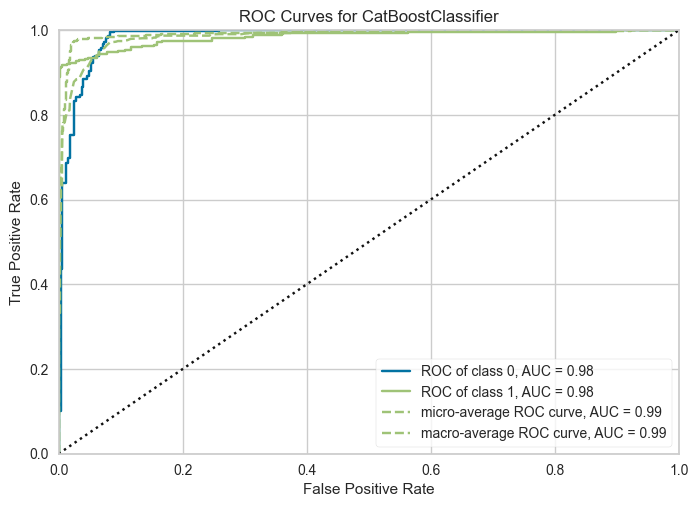

In [101]:
exp.plot_model(tuned_catboost, plot = 'auc')

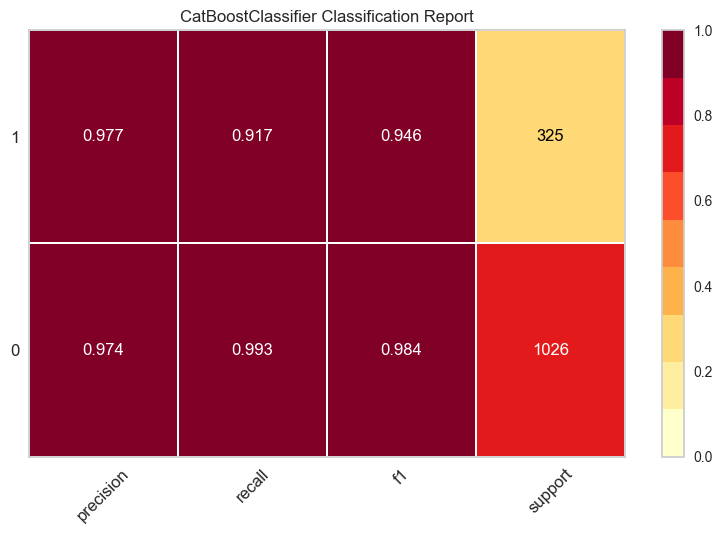

In [102]:
exp.plot_model(tuned_catboost, plot = 'class_report')

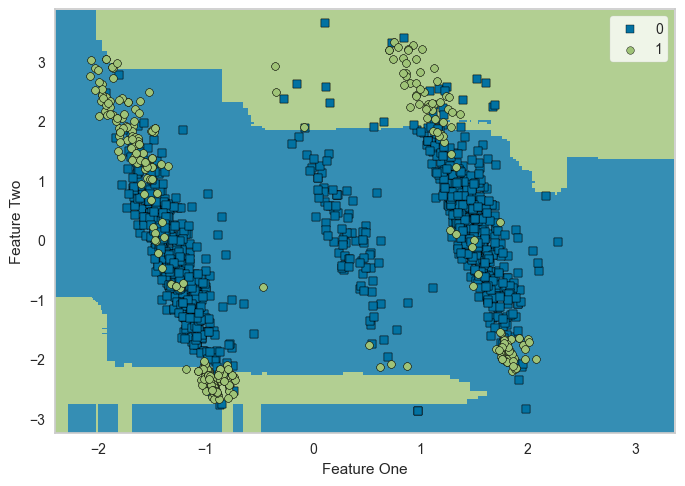

In [103]:
exp.plot_model(tuned_catboost, plot = 'boundary')

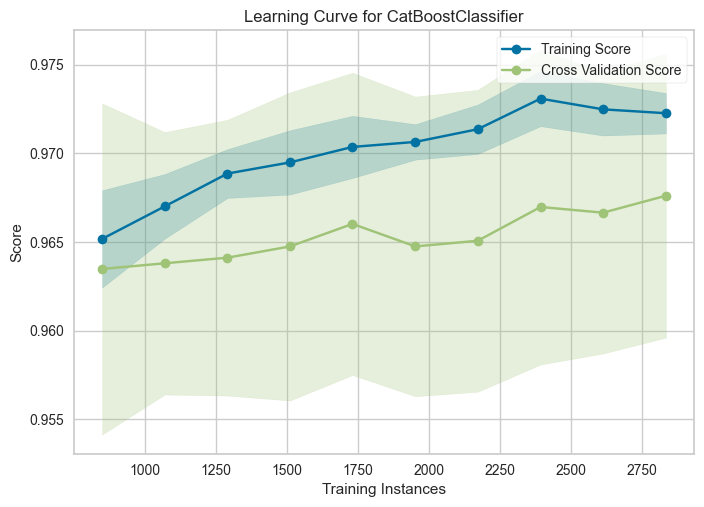

In [104]:
exp.plot_model(tuned_catboost, plot = 'learning')

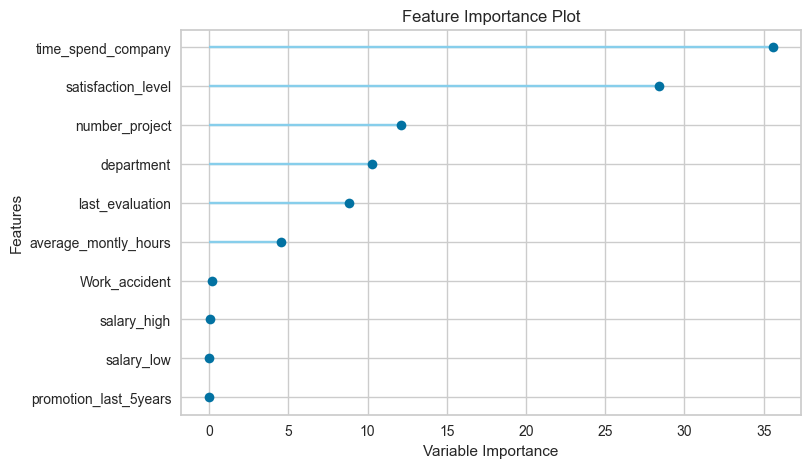

In [108]:
exp.plot_model(tuned_catboost, plot = 'feature')

## Predict Model

This function predicts Label using a trained model. When data is None, it predicts label on the holdout set. In PyCaret terminology, holdout is equivalent to our validation set. 

note: so far, our best model is the tuned_catboost model with the highest CV accuracy. :)


In [109]:
holdout_pred = exp.predict_model(tuned_catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9748,0.9846,0.9169,0.9770,0.9460,0.9296,0.9304


In [110]:
holdout_pred

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary_low,salary_medium,salary_high,left,prediction_label,prediction_score
3149,0.70,0.53,3.0,215.0,7.0,1.0,0.0,0.272894,0.0,1.0,0.0,0,0,0.9321
3150,0.99,0.67,5.0,153.0,2.0,0.0,0.0,0.170213,1.0,0.0,0.0,0,0,0.9920
3151,0.69,0.82,4.0,272.0,2.0,0.0,0.0,0.272894,1.0,0.0,0.0,0,0,0.9784
3152,0.88,0.89,4.0,135.0,3.0,0.0,0.0,0.205645,0.0,1.0,0.0,0,0,0.9863
3153,0.40,0.62,3.0,283.0,5.0,0.0,0.0,0.272894,1.0,0.0,0.0,0,0,0.8081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.92,0.82,4.0,168.0,3.0,0.0,1.0,0.259958,1.0,0.0,0.0,0,0,0.9870
4496,0.82,0.80,3.0,162.0,3.0,0.0,0.0,0.251142,0.0,1.0,0.0,0,0,0.9891
4497,1.00,0.59,3.0,168.0,3.0,0.0,1.0,0.259958,1.0,0.0,0.0,0,0,0.9882
4498,0.51,0.96,5.0,268.0,4.0,0.0,0.0,0.251142,1.0,0.0,0.0,0,0,0.9559


## Finalize Model

This function trains a given estimator on the entire dataset including the holdout set.

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [111]:
final_model = exp.finalize_model(tuned_catboost)

In [112]:
final_model

Pipeline(memory=Memory(location=C:\Users\jahan\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['satisfaction_level',
                                             'last_evaluation',
                                             'number_project',
                                             'average_montly_hours',
                                             'time_spend_company',
                                             'Work_accident',
                                             'promotion_last_5years'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value...
                                    transformer=LeaveOneOutEncoder(cols=['department'],
                                                                   drop_invariant=False,
                                                                   handle_missing='return_nan',
                                                                   handle_unknown='value',
                                                                   random_state=555,
                                                                   return_df=True,
                                                                   sigma=None,
                                                                   verbose=0))),
                ('low_variance',
                 TransformerWrapper(exclude=[], include=None,
                                    transformer=VarianceThreshold(threshold=0))),
                ('actual_estimator',
                 <catboost.core.CatBoostClassifier object at 0x0000028EA6372490>)],
         verbose=False)

### Final prediciton on unseen data

The predict_model() function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the data_unseen parameter. data_unseen is the variable created at the beginning of the tutorial and contains 10% of the original dataset which was never exposed to PyCaret.

In [114]:
unseen_predictions = exp.predict_model(final_model, data=data_unseen)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9780,0.9907,0.9478,0.9695,0.9585,0.9435,0.9436


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary_low,salary_medium,salary_high,left,prediction_label,prediction_score
0,0.53,0.85,3.0,236.0,6.0,0.0,0.0,0.249603,0.0,1.0,0.0,0,0,0.6093
1,0.50,0.95,2.0,208.0,2.0,0.0,0.0,0.293333,1.0,0.0,0.0,0,0,0.8622
2,0.76,0.64,4.0,234.0,2.0,0.0,0.0,0.249603,0.0,0.0,1.0,0,0,0.9823
3,0.64,0.94,4.0,210.0,3.0,0.0,0.0,0.234201,1.0,0.0,0.0,0,0,0.9784
4,0.76,1.00,5.0,219.0,5.0,0.0,0.0,0.261905,1.0,0.0,0.0,1,1,0.8559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.84,0.90,4.0,237.0,2.0,0.0,0.0,0.265201,1.0,0.0,0.0,0,0,0.9791
496,0.81,0.85,4.0,134.0,10.0,1.0,0.0,0.182292,0.0,1.0,0.0,0,0,0.9494
497,0.83,0.98,4.0,259.0,5.0,0.0,0.0,0.261905,0.0,1.0,0.0,1,1,0.8148
498,0.97,0.68,3.0,167.0,3.0,0.0,0.0,0.249603,1.0,0.0,0.0,0,0,0.9879


## Save Model

This function saves the transformation pipeline and trained model object into the current working directory as a pickle file for later use.

In [115]:
exp.save_model(final_model, 'my_pycaret_classifier')

Transformation Pipeline and Model Successfully Saved


(<catboost.core.CatBoostClassifier at 0x28ea63f0a90>,
 'my_pycaret_classifier.pkl')

## Load model

This function loads a previously saved pipeline.



In [116]:
my_winning_classifier = load_model('my_pycaret_classifier')

Transformation Pipeline and Model Successfully Loaded


In [117]:
my_winning_classifier

Additional Links: 

1. https://nbviewer.org/github/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb
2. https://nbviewer.org/github/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb
3. https://pycaret.gitbook.io/docs/get-started/quickstart#classification
4. https://pycaret.readthedocs.io/en/stable/api/classification.html PyCaret2.0
5. https://pycaret.readthedocs.io/en/latest/installation.html PyCaret3.0
6. https://towardsdatascience.com/pycaret-3-0-is-coming-soon-whats-new-e890e6a69ff5